# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Изучение общей информации. 

Откроем файл с данными для выполнения анализа и изучим общую информацию.

Для работы с датасетом импортируем библиотеку `pandas`, модуль pyplot из библиотеки `matplotlib` и загрузим сам датасет `real_estate_data.csv` в переменную `data`. Для удобства просмотра установим параметры для отображения всех столбцов датафрейма.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
# включим отображение всех столбцов датафрейма при выводе на экран

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если файл с данными отсутствует на устройстве, он будет подгружен по указанной ссылке

Отобразим первые 5 строк датасета.

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Описание данных**\
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)\
`balcony` — число балконов\
`ceiling_height` — высота потолков (м)\
`cityCenters_nearest` — расстояние до центра города (м)\
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)\
`first_day_exposition` — дата публикации\
`floor` — этаж\
`floors_total` — всего этажей в доме\
`is_apartment` — апартаменты (булев тип)\
`kitchen_area` — площадь кухни в квадратных метрах (м²)\
`last_price` — цена на момент снятия с публикации\
`living_area` — жилая площадь в квадратных метрах (м²)\
`locality_name` — название населённого пункта\
`open_plan` — свободная планировка (булев тип)\
`parks_around3000` — число парков в радиусе 3 км\
`parks_nearest` — расстояние до ближайшего парка (м)\
`ponds_around3000` — число водоёмов в радиусе 3 км\
`ponds_nearest` — расстояние до ближайшего водоёма (м)\
`rooms` — число комнат\
`studio` — квартира-студия (булев тип)\
`total_area` — общая площадь квартиры в квадратных метрах (м²)\
`total_images` — число фотографий квартиры в объявлении

Определим за какой период представлены объявления в датасете. Для этого выведем на экран и отсортируем значения столбца `first_day_exposition`

In [4]:
data['first_day_exposition'].sort_values()

10132    2014-11-27T00:00:00
8393     2014-11-27T00:00:00
15857    2014-11-27T00:00:00
2831     2014-11-27T00:00:00
696      2014-11-27T00:00:00
                ...         
10917    2019-05-03T00:00:00
5986     2019-05-03T00:00:00
9217     2019-05-03T00:00:00
21887    2019-05-03T00:00:00
15072    2019-05-03T00:00:00
Name: first_day_exposition, Length: 23699, dtype: object

В датасете содержатся объявления за период с 27 ноября 2014 года по 3 мая 2019 года.

Выведем общую информацию о датасете.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Отметим, что в данных имеется множество пропущенных значений. Также при обработке данных некоторые столбцы нужно будет привести к другому типу данных. 

Построим общую гистораммы всех числовых значений датафрейма для предварительной оценки характера распределения значений.

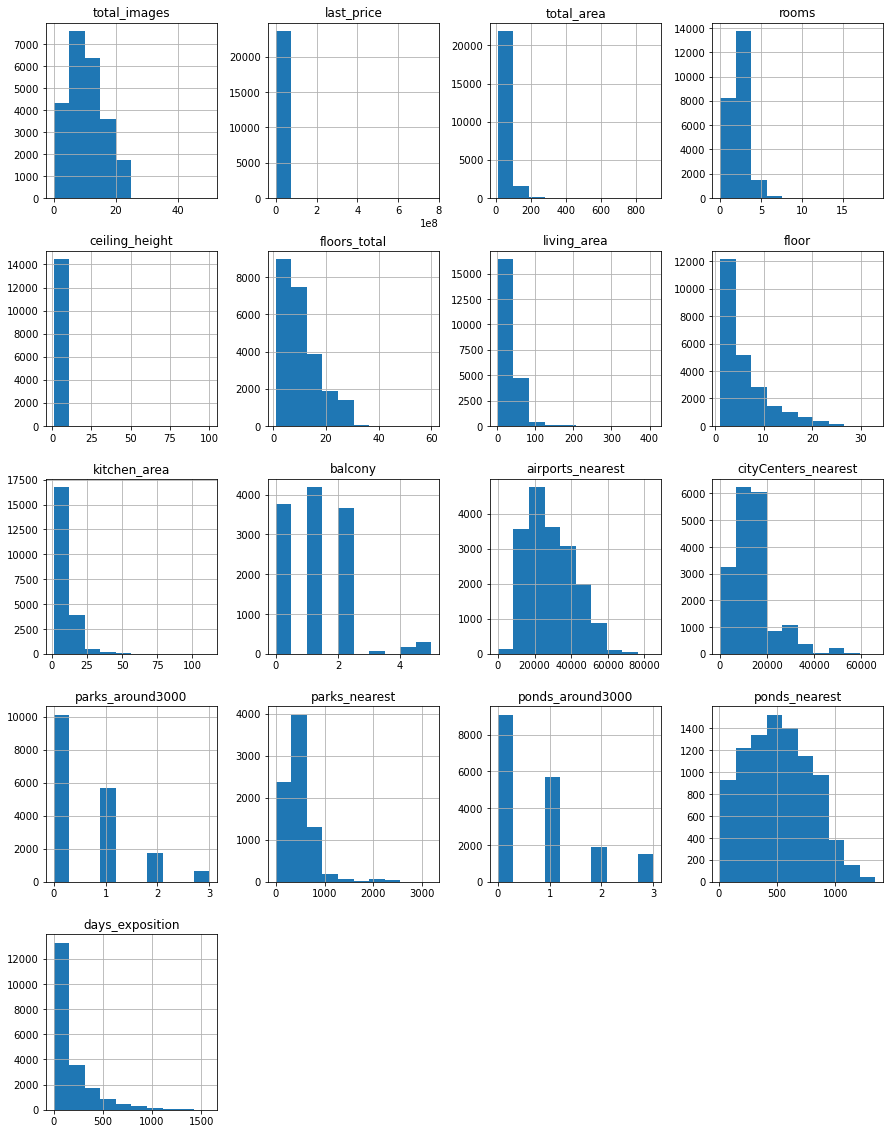

In [6]:
data.hist(figsize=(15, 20))
plt.show()

**Вывод:** в результате ознакомления с предоставленными данными установлено следующее:
- в архиве содержатся объявления за период с 27 ноября 2014 года по 3 мая 2019 года
- имеется множество пропусков в данных
- тип данных столбца `first_day_exposition` может затруднить дальнейшую обработку данных.\

Для проведения анализа целесообразно по-возможности заполнить пропуски в данных, а также привести тип данных столбца `first_day_exposition` к более удобному для вычислений.

## Предобработка данных

Для выполнения анализа необходимо обработать полученные данные: по-возможности заполнить пропущенные значения, привести типы данных колонок в соответствие с содержащимися в них данными, проверить данные на наличие дубликатов и устранить их, найти и устранить редкие и выбивающиеся значения в данных.

Перед обработкой данных запишем количество строк в необработанном датафрейме в переменную `old_data_size` для того, чтобы после обработки вычислить процент потерянных данных.

In [7]:
old_data_size = data.shape[0]

Приведем наименования столбцов `cityCenters_nearest`, `parks_around3000` и `ponds_around3000` к корректному виду.

In [8]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', \
                     'parks_around3000': 'parks_around_3000', \
                    'ponds_around3000': 'ponds_around_3000'})

Проверим, указана ли площадь кухни для квартир типа "студия".

In [9]:
data[data['studio']]['kitchen_area'].unique()

array([nan])

Отметим, что для квартир-студий не указывается площадь кухни.

Заменим пропуски в столбце `is_apartment` значениями `False`, исходя из предположения о том, что данные в этом столбце не заполнялись пользователем, если объект недвижимости не является апартаментами.

In [10]:
data['is_apartment'].fillna(False, inplace=True)

По тому же принципу заполним пропуски в столбце `balcony`, `ponds_around_3000` и `parks_around_3000`. Если не указывалось количество - значит балконы, водоемы или парки отсутствуют.

In [11]:
data['balcony'].fillna(0, inplace=True)
data['ponds_around_3000'].fillna(0, inplace=True)
data['parks_around_3000'].fillna(0, inplace=True)

Пропуски в столбце `ceiling_height` заполинм медианным значением высоты потолков (2.65 м).

In [12]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

После всех преобразований выведем ещё раз информацию о датафрейме.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ К ОБРАБОТКЕ ПРОПУСКОВ</b></u></font>
    <br /><br />
    <font color='4682B4'>Пропуски в столбцах is_apartment, balcony, ponds_around_3000 и parks_around_3000 обусловлены тем, что при заполнении данных, если объект не является аппатаментами, если балконы, парки и водоемы поблизости отсутствуют, поле с указанным критерием пользователи оставляли пустым.
    <br /><br />
    Т.к. в датафрейме основная часть данных по высоте потолков представлена небольшим диапазоном значений, пропуски в столбце ceiling_height заполним медианным значением высоты потолков. 
    <br /><br />
    Данные в floors_total, ceiling_height, living_area, kitchen_area, locality_name также не были заполнены пользователем. В датафрейме отсутствует информация, на основании которой можно заполнить пропуски в указанных колонках. В столбце kitchen_area для всех квартир-студий не указана площадь кухни, т.к. кухня не является отдельным помещением. 
    <br /><br />
    Пропуски в столбцах city_centers_nearest, airports_nearest, park_nearest, ponds_nearest появились в результате автоматической обработки данных. park_nearest, ponds_nearest имеют пропуски по причине отсутствия парков или водоемов поблизости с объектом (столбцы parks_around_3000 и ponds_around_3000 имеют значение 0). city_centers_nearest, airports_nearest содержат пропуски либо из-за того, что аэропорт или центр города находится слишком далеко от объекта, либо из-за отсутствия картографических данных по некоторым объектам.
    <br /><br />
    В столбце days_exposition, вероятно, пропуски имеются по причине того, что объявление о продаже на момент выгрузки данных еще не было снято.
    </font>
</div>

Приведем столбец с указанием даты размещения объявления `first_day_exposition` к типу `datetime`.

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], \
                                              format='%Y-%m-%dT%H:%M:%S')

Приведем значения столбцов `balcony`, `parks_around_3000`, `ponds_around_3000` к целочисленному виду, т.к. данные в них подразумевают под собой только целое число. Значения столбцов `days_exposition` и `floors_total` оставим типа float, т.к. в них имеются пропущенные значения и привести их к типу int не представляется возможным.

In [15]:
for i in ['balcony', 'parks_around_3000', 'ponds_around_3000']:
    data[i] = data[i].astype('int', errors='ignore')

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ К ПРЕОБРАЗОВАНИЮ ТИПОВ ДАННЫХ</b></u></font>
    <br /><br />
    <font color='4682B4'>Столбец с указанием даты размещения объявления приведен к типу datetime, т.к. это упростит дальнейшую работу с датой (извлечение номера дня, месяца, года и др.). Столбцы balcony, parks_around_3000, ponds_around_3000 приведены к типу целочисленных данных, т.к. данные в них подразумевают под собой указание целого числа. Столбцы floors_total и days_exposition имеют пропущенные значения, поэтому привести их к типу int не представляется возможным.</font>
</div>

Выведем на экран уникальные значения столбца со значениями высоты потолков `ceiling_height`. Для наглядности отсортируем значения по возрастанию.

In [16]:
sorted(data[data['ceiling_height'].notna()]['ceiling_height'].unique())

[1.0,
 1.2,
 1.75,
 2.0,
 2.2,
 2.25,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,

В данных имеются значения высоты потолков 22.6м, 24.0м ... 32.0м, которые могли быть ошибочно введены вместо 2.26м, 2.40м ... 3.20м. Откорректируем указанные значения.

In [17]:
data['ceiling_height'] = (
    data['ceiling_height']
    .where((data['ceiling_height'] > 32) | (data['ceiling_height'] < 22), data['ceiling_height'] / 10)
)
# с помощью метода "where" все строки столбца с высотой потолков проверим на условие 
# "высота потолков больше 32 м или меньше 10 м". Значения, не удовлетворяющие этому условию, будут поделены на 10

data['ceiling_height'] = round((data['ceiling_height']), 2)
# округлим значения столбца `ceiling_height` до двух знаков после запятой

Также в столбце со значениями высоты потолков присутствуют аномальные значения высоты потолков. Исключим из исследования строки со значениями высоты потолков менее 2.2м и более 5.0м.

In [18]:
data = data[~(data['ceiling_height'] < 2.2) | (data['ceiling_height'] > 5.0)]

Убедимся, что все аномальные значения высоты потолков исключены из датафрейма.

In [19]:
sorted(data[data['ceiling_height'].notna()]['ceiling_height'].unique())

[2.2,
 2.25,
 2.26,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,
 4.0,
 4.06,
 4.1

Проверим, содержатся ли в датафрейме выбивающиеся значения цены объекта. Для этого выведем на экран первые 10 и последние 10 значений отсортированного списка уникальных значений столбца `last_price`.

In [20]:
sorted(data['last_price'].unique())[:10]

[12190.0,
 430000.0,
 440000.0,
 450000.0,
 470000.0,
 480000.0,
 490000.0,
 500000.0,
 520000.0,
 530000.0]

In [21]:
sorted(data['last_price'].unique())[-10:]

[190870000.0,
 230000000.0,
 240000000.0,
 245000000.0,
 289238400.0,
 300000000.0,
 330000000.0,
 401300000.0,
 420000000.0,
 763000000.0]

Выведением на экран строку, где цена объекта равна 12190 руб.

In [22]:
data[data['last_price'] == 12190]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0


Значение цены 12190.0 руб. значительно отличается от других минимальных. Проверим диапазон стоимости аналогичных объектов в Санкт-Петербурге с расстоянием 9000-10000 м до центра и общей площадью 100-110 м.кв.

In [23]:
data[(data['locality_name'] == 'Санкт-Петербург') & (data['total_area'] > 100) & (data['total_area'] < 110) \
     & (data['city_centers_nearest'] < 10000) & (data['city_centers_nearest'] > 9000)].sort_values('last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0
13674,1,7160000.0,108.0,2016-01-23,4,2.65,25.0,61.2,9,False,False,False,13.3,0,Санкт-Петербург,42407.0,9579.0,0,NaN,0,NaN,285.0
17988,8,8400000.0,108.0,2017-05-17,3,2.65,26.0,53.2,13,False,False,False,14.2,1,Санкт-Петербург,40648.0,9888.0,1,1248.0,0,NaN,119.0
389,13,8500000.0,103.8,2018-02-13,4,2.65,5.0,74.6,3,False,False,False,9.5,0,Санкт-Петербург,13398.0,9120.0,0,NaN,0,NaN,368.0
11060,16,9900000.0,105.2,2016-06-27,4,2.65,15.0,63.9,5,False,False,False,13.3,1,Санкт-Петербург,27666.0,9479.0,1,637.0,0,NaN,893.0
13351,5,9900000.0,108.0,2017-05-10,4,2.65,21.0,NaN,6,False,False,False,NaN,2,Санкт-Петербург,36579.0,9092.0,0,NaN,1,454.0,140.0
18169,20,12600000.0,109.0,2017-07-16,2,2.75,25.0,53.0,13,False,False,False,19.0,1,Санкт-Петербург,36724.0,9781.0,1,645.0,0,NaN,NaN
4788,16,12700000.0,106.4,2017-07-10,3,2.75,23.0,66.0,16,False,False,False,12.2,0,Санкт-Петербург,36724.0,9781.0,1,645.0,0,NaN,NaN
14809,17,13300000.0,101.2,2018-03-03,3,2.75,25.0,55.4,25,False,False,False,13.5,1,Санкт-Петербург,36533.0,9289.0,1,674.0,0,NaN,74.0
21596,20,13400000.0,102.0,2017-09-15,3,2.75,25.0,50.7,12,False,False,False,15.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,157.0


На основании отфильтрованных данных видим, что значение 12190.0 - это цена, указанная в тысячах рублей. Домножим это значение на 1000, чтобы получить значение в рублях.

In [24]:
data.loc[8793, 'last_price'] *= 1000

Проверим, сколько в датафрейме содержится объектов с ценой более 100 000 000 руб.

In [25]:
data.query('last_price > 50000000').shape[0]

131

Исключим из датафрейма объекты с аномально высокими значениями цены.

In [26]:
data = data.query('last_price <= 50000000')

Проверим, сколько в датафрейме содержится объектов с общей площадью более 200 м.кв..

In [27]:
data.query('total_area > 200').shape[0]

146

Исключим из датафрейма объекты с общей площадью более 200 м.кв.

In [28]:
data = data.query('total_area <= 200')

Выведем уникальные значения количества комнат.

In [29]:
sorted(data['rooms'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 11]

Проверим, сколько объектов с числом комнат больше 7 содержится в датафрейме.

In [30]:
data.query('rooms > 6').shape[0]

24

Исключим из датафрейма объекты с аномально большими значениями количества комнат.

In [31]:
data = data[data['rooms'] <= 6]

Найдем все объекты с количеством комнат, равным нулю.

In [32]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,2.65,24.0,15.50,2,False,True,False,NaN,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,2.65,14.0,17.00,1,False,False,True,NaN,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,2.65,17.0,24.75,4,False,True,False,NaN,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,2.65,26.0,24.30,19,False,False,True,NaN,1,посёлок Парголово,53115.0,19292.0,0,NaN,1,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,2.65,10.0,NaN,7,False,True,False,NaN,0,посёлок Шушары,NaN,NaN,0,NaN,0,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,2.65,25.0,18.00,16,False,True,False,NaN,0,Санкт-Петербург,11405.0,13222.0,0,NaN,1,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,2.65,24.0,18.00,4,False,False,True,NaN,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,2.65,19.0,NaN,8,False,True,False,NaN,0,Санкт-Петербург,18090.0,17092.0,0,NaN,2,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,2.65,9.0,18.00,8,False,False,True,NaN,2,Никольское,NaN,NaN,0,NaN,0,NaN,82.0


Таких объектов всего 196. Проверим, все ли объекты с количеством комнат "0" являются квартирой-студией или объектом со свободной планировкой.

In [33]:
data.query('rooms == 0 and ((open_plan == True) or (studio == True))')['total_area'].count()

196

Количество комнат "0" указано для квартир-студий и объектов со свободной планировкой.

Проверим данные на наличие дубликатов.

In [34]:
data.duplicated().sum() # проверим на наличие полных дубликатов строк

0

Полные дубликаты строк отсутствуют.

Данные с названиями локации могут иметь неявные дубликаты. Выведем список уникальных значений столбца `locality_name`. Для более удобного просмотра отсортируем список.

In [35]:
sorted(data[data['locality_name'].notna()]['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

На основании данного списка отметим, что одинаковые значения могут иметь различное написание (например, "пос**е**лок Стекляный" и "пос**ё**лок Стекляный", "Никольское" и "село Никольское" и т.п.).

Для определения различных вариантов написания населенных пунктов создадим функцию, которая на вход будет принимать строку с типом и названием населенного пункта, а возвращать только название.

In [36]:
def find_name(row):
    some_str = ''
    try:
        for word in row.split():
        # Перебор слов в строке
            if word == word.title() and some_str == '':
                some_str += word
            # Если слово написано с заглавной буквы, оно добавляется в пустую строку
            elif word == word.title() and some_str != '':
                some_str += (' ' + word)
                # Если название населенного пункта состоит из двух слов, 
                # второе слово, написанное с заглавной буквы тоже добавляется в строку
        return some_str
        # Возвращается название населенного пункта, без указания типа
    except:
        pass
    # Для того, чтобы работа функции не прекращалась при приеме на вход значения NaN, пропишем исключение

Добавим в датафрейм новый столбец, в котором будут прописаны названия населенных пунктов.

In [37]:
# pd.set_option('display.max_rows', None)
data.insert(15, 'rename_locality_name', data['locality_name'].apply(find_name))
# Вставим новый столбец после столбца с названием локации.
# За основу возьмем столбец 'locality_name', к которому применим ранее написанную функцию.

data['rename_locality_name'].unique()
# Выведем список уникальных значений нового столбца.

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Выведем с помощью цикла все возможные написания локаций с одинаковым названием. Нас интересуют только значения, где неявных дубликатов названий 2 и более, для дальнейшего приведения их к единому виду.

In [38]:
for name in data['rename_locality_name'].unique():
    if len(data[data['rename_locality_name'] == name]['locality_name'].unique()) > 1:
        print(data[data['rename_locality_name'] == name]['locality_name'].unique())
# Цикл проверяет каждое название населенного пункта из списка уникальных значений
# и выводит на экран различные виды его написания (если вариантов написания названия локации 2 и более)


['городской посёлок Янино-1' 'городской поселок Янино-1']
['посёлок Мурино' 'поселок Мурино' 'Мурино']
['деревня Кудрово' 'Кудрово']
['поселок городского типа Красный Бор'
 'посёлок городского типа Красный Бор']
['деревня Фёдоровское' 'городской посёлок Фёдоровское']
['посёлок городского типа Лебяжье' 'поселок городского типа Лебяжье']
['поселок городского типа Кузьмоловский'
 'посёлок городского типа Кузьмоловский']
['посёлок Аннино' 'поселок Аннино']
['посёлок Новый Свет' 'поселок Новый Свет']
['Никольское' 'село Никольское']
['посёлок Бугры' 'поселок Бугры']
['поселок городского типа Рощино' 'посёлок городского типа Рощино'
 'городской посёлок Рощино']
['село Павлово' 'городской посёлок Павлово'
 'посёлок городского типа Павлово']
['посёлок Победа' 'поселок Победа']
['поселок Терволово' 'посёлок Терволово']
['поселок городского типа Советский' 'городской посёлок Советский']
['посёлок Петровское' 'поселок Петровское']
['посёлок городского типа Токсово' 'поселок городского типа Токсов

В результате мы видим, какие преобразования необходимо произвести, чтобы избавиться от неявных дубликатов:
- заменить 'ё' на 'е', чтобы ислючить дублкаты, содержащие 'поселок' и 'посёлок'
- значения, содержащие 'городской поселок' и 'поселок городского типа' привести к единому виду
- значения, содержащие 'поселок станции' и 'поселок при железнодорожной станции' привести к единому виду
- значения с разным написанием типа 'деревня Кудрово' и 'Кудрово' привести к единому виду

Также отметим, что в данных содержатся значения населенных пунктов с одинаковыми названиями, но разными типами (например, 'село Павлово' и 'городской поселок Павлово', 'поселок Зимитицы' и 'деревня Зимитицы' и т.п.).

Выполним все необходимые преобразования.

In [39]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
# Заменим букву 'ё' на 'е' во всех ячейках столбца `locality_name`

In [40]:
for val in ['поселок городского типа', 'городской поселок', 'коттеджный поселок', \
            'поселок станции', 'поселок при железнодорожной станции']:
    data['locality_name'] = data['locality_name'].str.replace(val, 'поселок')
# Также заменим различные написания типа населенного пункта из представленных в списке в единый ('поселок')

In [41]:
data['locality_name'].replace({'Мурино': 'поселок Мурино', 'Кудрово': 'деревня Кудрово', 'Никольское': 'село Никольское', \
                              'Любань': 'поселок Любань'}, inplace=True)
# Перепишем значения, в которых не указан тип населенного пункта ('Мурино', 'Кудрово', 'Никольское', 'Любань')

Повторно выведем с помощью цикла все возможные написания локаций с одинаковым названием, где неявных дубликатов названий 2 и более.

In [42]:
for name in data['rename_locality_name'].unique():
    if len(data[data['rename_locality_name'] == name]['locality_name'].unique()) > 1:
        print(data[data['rename_locality_name'] == name]['locality_name'].unique())

['деревня Федоровское' 'поселок Федоровское']
['село Павлово' 'поселок Павлово']
['поселок Рахья' 'садовое товарищество Рахья']
['поселок Зимитицы' 'деревня Зимитицы']
['деревня Калитино' 'поселок Калитино']
['поселок Приладожский' 'садовое товарищество Приладожский']
['поселок Щеглово' 'деревня Щеглово']
['деревня Рабитицы' 'поселок Рабитицы']
['деревня Гарболово' 'поселок Гарболово']


В результате обработки остались только населенные пункты с одинаковым названием, но с разным типом. 

Проверим, какой процент данных оказался потерян при обработке данных.

In [43]:
round(((1 - data.shape[0] / old_data_size) * 100), 2)

1.33

В результате обработки данных потреяно незначительное количество данных (1.33%).

**Вывод:** в результате предобработки данных выполнено следующее:
- заполнены пропуски в данных в столбцах `is_apartament`, `balcony`, `ponds_around_3000`, `parks_around_3000`, `ceiling_height`
- данные в столбце с указанием даты размещения `first_day_exposition` приведены к типу `datetime`
- исключены аномальные значения высоты потолков, количества комнат, общей площади и цены
- откорректировано введенное с ошибкой значение стоимости объекта в столбце `last_price`
- устранены неявные дубликаты в столбце с названиями населенных пунктов `locality_name`

## Дополнение таблицы новыми столбцами с данными

Для последующего выполнения анализа дополним таблицу следующими данными:
- цена одного квадратного метра
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние до центра города в километрах

Добавим в датафрейм столбец с указанием стоимости квадратного метра жилья. Округлим полученные значения до целых чисел.

In [44]:
data.insert(2, 'price_sq_meter', round(data['last_price'] / data['total_area']))

Добавим столбцы `weekday_exp` `month_exp` `year_exp`, которые из даты размещения объявления извлекают отдельно день недели, месяц и год размещения.

In [45]:
data.insert(5, 'weekday_exp', pd.DatetimeIndex(data['first_day_exposition']).weekday)
data.insert(6, 'month_exp', pd.DatetimeIndex(data['first_day_exposition']).month)
data.insert(7, 'year_exp', pd.DatetimeIndex(data['first_day_exposition']).year)

Добавим в таблицу столбец `floor_type` с указанием типа этажа: "первый", "последний" или "другой".\
Для этого напишем функцию, которая будет возвращать значение в зависимости от общего количества этажей и номера этажа объекта.\
Если общее количество этажей в доме не указано и этаж объекта не первый, функция вернет `None`.

In [46]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if pd.isna(row['floors_total']):
        return None
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

Вставим столбец `floor_type` с применением написанной выше функции.

In [47]:
data.insert(13, 'floor_type', data.apply(floor_type, axis=1))

Добавим столбец с указанием расстояния до центра города в километрах на основании столбца `city_center_nearest` с округлением значения до целых значений.

In [48]:
data.insert(23, 'city_centers_nearest_km', round(data['city_centers_nearest'] / 1000))

Выведем первые 15 строк датафрейма.

In [49]:
data.head(15)

,total_images,last_price,price_sq_meter,total_area,first_day_exposition,weekday_exp,month_exp,year_exp,rooms,ceiling_height,floors_total,living_area,floor,floor_type,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,rename_locality_name,airports_nearest,city_centers_nearest,city_centers_nearest_km,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,120370.0,108.00,2019-03-07,3,3,2019,3,2.70,16.0,51.00,8,другой,False,False,False,25.00,0,Санкт-Петербург,Санкт-Петербург,18863.0,16028.0,16.0,1,482.0,2,755.0,NaN
1,7,3350000.0,82921.0,40.40,2018-12-04,1,12,2018,1,2.65,11.0,18.60,1,первый,False,False,False,11.00,2,поселок Шушары,Шушары,12817.0,18603.0,19.0,0,NaN,0,NaN,81.0
2,10,5196000.0,92786.0,56.00,2015-08-20,3,8,2015,2,2.65,5.0,34.30,4,другой,False,False,False,8.30,0,Санкт-Петербург,Санкт-Петербург,21741.0,13933.0,14.0,1,90.0,2,574.0,558.0
4,2,10000000.0,100000.0,100.00,2018-06-19,1,6,2018,2,3.03,14.0,32.00,13,другой,False,False,False,41.00,0,Санкт-Петербург,Санкт-Петербург,31856.0,8098.0,8.0,2,112.0,1,48.0,121.0
5,10,2890000.0,95066.0,30.40,2018-09-10,0,9,2018,1,2.65,12.0,14.40,5,другой,False,False,False,9.10,0,поселок Янино-1,Янино-1,NaN,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000.0,99196.0,37.30,2017-11-02,3,11,2017,1,2.65,26.0,10.60,6,другой,False,False,False,14.40,1,поселок Парголово,Парголово,52996.0,19143.0,19.0,0,NaN,0,NaN,155.0
7,5,7915000.0,110545.0,71.60,2019-04-18,3,4,2019,2,2.65,24.0,NaN,22,другой,False,False,False,18.90,2,Санкт-Петербург,Санкт-Петербург,23982.0,11634.0,12.0,0,NaN,0,NaN,NaN
8,20,2900000.0,87455.0,33.16,2018-05-23,2,5,2018,1,2.65,27.0,15.43,26,другой,False,False,False,8.81,0,поселок Мурино,Мурино,NaN,NaN,NaN,0,NaN,0,NaN,189.0
9,18,5400000.0,88525.0,61.00,2017-02-26,6,2,2017,3,2.50,9.0,43.60,7,другой,False,False,False,6.50,2,Санкт-Петербург,Санкт-Петербург,50898.0,15008.0,15.0,0,NaN,0,NaN,289.0
10,5,5050000.0,127525.0,39.60,2017-11-16,3,11,2017,1,2.67,12.0,20.30,3,другой,False,False,False,8.50,0,Санкт-Петербург,Санкт-Петербург,38357.0,13878.0,14.0,1,310.0,2,553.0,137.0


**Вывод:** для выполнения анализа данных в таблицу добавлены следующие параметры:
- `city_centers_nearest_km` - цена одного квадратного метра
- `weekday_exp` - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
- `month_exp` - месяц публикации объявления
- `year_exp` - год публикации объявления
- `floor_type` - тип этажа квартиры (значения — «первый», «последний», «другой»)
- `price_sq_meter` - расстояние до центра города в километрах

## Проведение исследовательского анализа данных

### Построение гистограмм распределения значений

Для предварительной оценки распределения значений построим отдельные гистограммы для интересующих нас параметров объектов недвижимости.

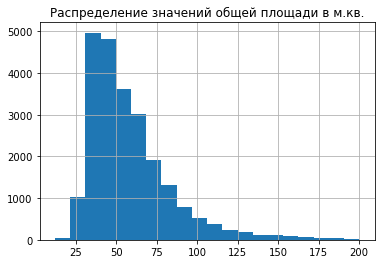

In [50]:
data.hist('total_area', bins=20)
plt.title('Распределение значений общей площади в м.кв.')
plt.show()

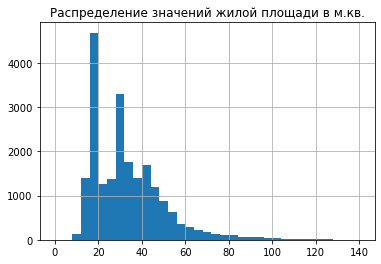

In [51]:
data.hist('living_area', bins=35, range=(0, 140))
plt.title('Распределение значений жилой площади в м.кв.')
plt.show()

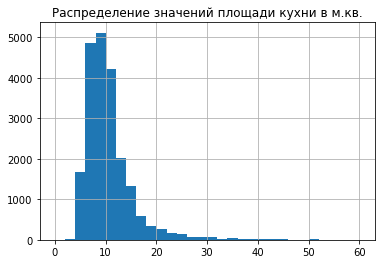

In [52]:
data.hist('kitchen_area', bins=30, range=(0, 60))
plt.title('Распределение значений площади кухни в м.кв.')
plt.show()

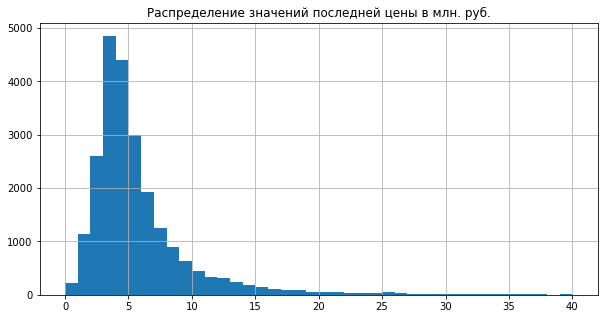

In [53]:
(data['last_price'] / 1000000).hist(bins=40, range=(0, 40), figsize=(10, 5))
plt.title('Распределение значений последней цены в млн. руб.')
plt.show()

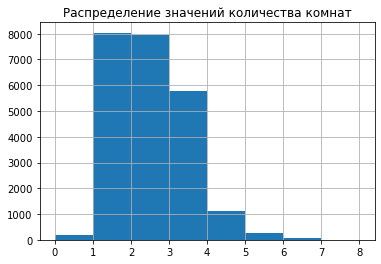

In [54]:
data.hist('rooms', bins=8, range=(0, 8))
plt.title('Распределение значений количества комнат')
plt.show()

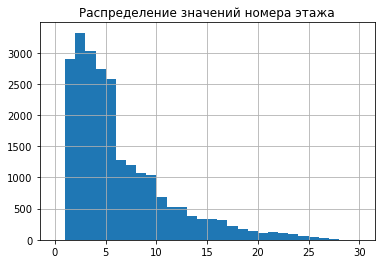

In [55]:
data.hist('floor', bins=30, range=(0, 30))
plt.title('Распределение значений номера этажа')
plt.show()

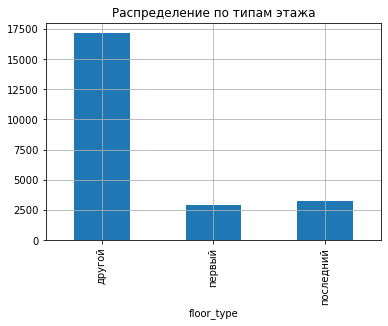

In [56]:
data.groupby(by='floor_type')['floor_type'].count().plot(kind='bar', grid=True)
plt.title('Распределение по типам этажа')
plt.show()

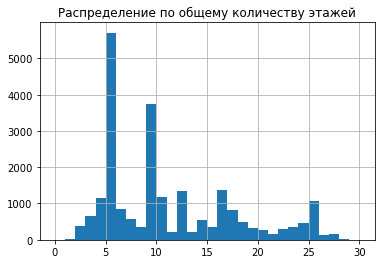

In [57]:
data.hist('floors_total', bins=30, range=(0, 30))
plt.title('Распределение по общему количеству этажей')
plt.show()

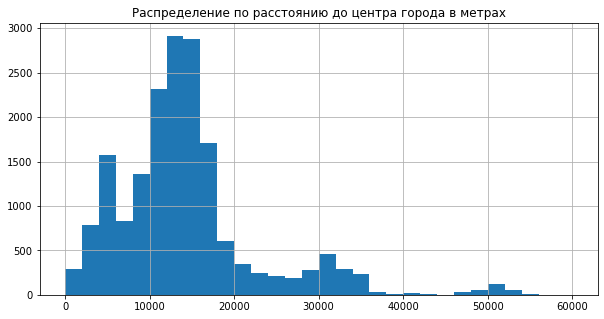

In [58]:
data.hist('city_centers_nearest', bins=30, range=(0, 60000), figsize=(10, 5))
plt.title('Распределение по расстоянию до центра города в метрах')
plt.show()

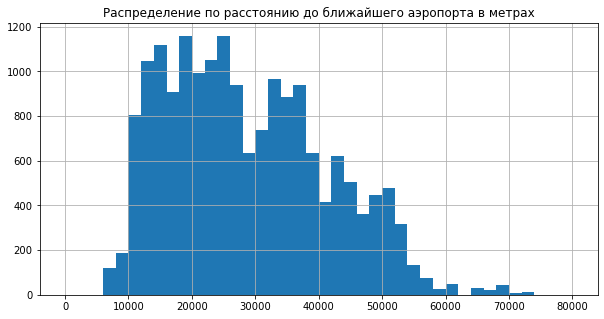

In [59]:
data.hist('airports_nearest', bins=40, range=(0, 80000), figsize=(10, 5))
plt.title('Распределение по расстоянию до ближайшего аэропорта в метрах')
plt.show()

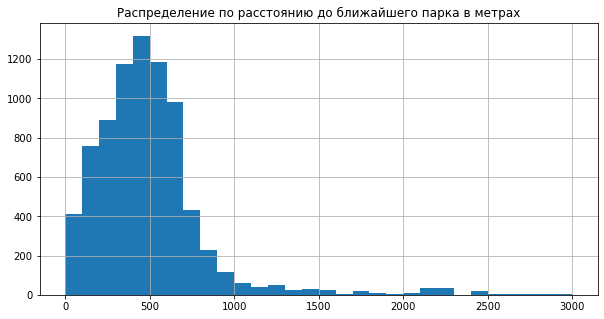

In [60]:
data.hist('parks_nearest', bins=30, range=(0, 3000), figsize=(10, 5))
plt.title('Распределение по расстоянию до ближайшего парка в метрах')
plt.show()

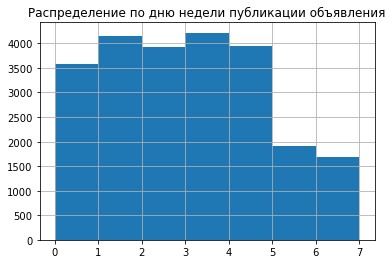

In [61]:
data.hist('weekday_exp', bins=7, range=(0, 7))
plt.title('Распределение по дню недели публикации объявления')
plt.show()

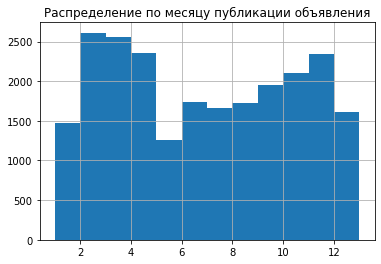

In [62]:
data.hist('month_exp', bins=12, range=(1, 13))
plt.title('Распределение по месяцу публикации объявления')
plt.show()

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>НАБЛЮДЕНИЯ ПО ПАРАМЕТРАМ ОБЪЕКТОВ НЕДВИЖИМОСТИ</b></u></font>
    <br /><br />
    <font color='4682B4'>Из гистограммы распределения общей площади, жилой площади и площади кухни объекта видим, что наиболее часто встречаются объявления с объектами общей площадью от 30 до 60 м.кв, жилой площадью от 16 до 20 м.кв и от 28 до 32 м.кв, площадью кухни от 6 до 12 м. кв.
    <br /><br />
    В предоставленных данных больше всего объектов стоимостью 3-4 млн руб.
    <br /><br />
    Чаще всего объекты имеют 1 и 2 комнаты, реже 3 комнаты.
    <br /><br />
    В наибольшем количестве представлены объекты с номерами этажей от 1 до 5, что подтверждает гистограмма с общим количеством этажей, на которой указано, что объектов в пятиэтажных домах больше всего. Среди типов этажа "другой" превалирует над "первым" и "последним", что вполне логично, поскольку для данного типа больше вариантов значений номера этажа.
    <br /><br />
    Чаще встречаются объекты с расстоянием 10 - 14 км до центра города. В целом наибольшая часть выборки представлена объектами, находящимися на расстоянии до 18 км от центра города.
    <br /><br />
    Наиболее часто встречаются объекты с расстоянием от 10 до 38 км до аэропорта.
    <br /><br />
    Среди объектов выборки, для которых указано расстояние до ближайшего парка (примерно 30% выборки), наиболее часто встречаются объекты, на расстоянии 200-600 м от которых находится парк. 
    <br /><br />
    Гистограмма распределения публикации объявлений по дням недели показывает, что в будние дни объявления публикуются чаще (около 4000 объявлений из выборки на каждый из будних дней недели), чем в выходные (около 1800 объявлений из выборки на каждый из выходных дней недели).
    <br /><br />
    По гистограмме распределения публикации объявлений по месяцам можно заметить некую сезонность. Чаще всего объявления публикуются с февраля по апрель. Также с сентября отмечается рост количества публикации объявлений, который достигает пика в ноябре.
    </font>
</div>

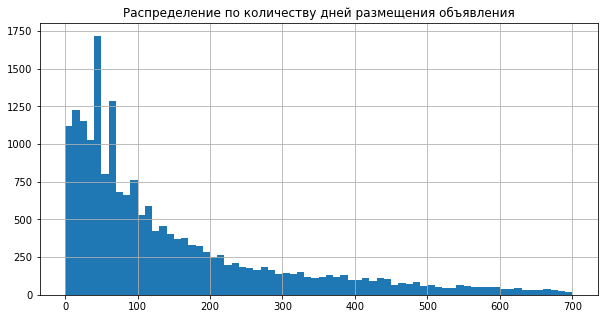

In [63]:
data['days_exposition'].hist(bins=70, range=(0, 700), figsize=(10, 5))
plt.title('Распределение по количеству дней размещения объявления')
plt.show()

In [64]:
data['days_exposition'].describe()

count    20280.000000
mean       179.478797
std        218.182134
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>НАБЛЮДЕНИЯ ПО ВРЕМЕНИ ПРОДАЖИ ОБЪЕКТА</b></u></font>
    <br /><br />
    <font color='4682B4'>Поскольку разброс значений времени продажи объекта большой и имеет неравномерное распределение, для оценки среднего времени продажи целесообразно использовать медианное значение - 95 дней.
    <br /><br />    
    Необычно долгими будем считать продажи, объявления по которым были опубликованы более 700 дней. Быстрые продажи - до 50 дней.
    </font>
</div>

### Проверка зависимости цены объекта от различных параметров

Проверим, есть ли зависимость цены объекта от следующих параметров: общая площадь; жилая площадь; площадь кухни; количество комнат; этаж, на котором расположена квартира (первый, последний, другой); дата размещения (день недели, месяц, год).

Для более понятного отображения диаграмм добавим в датафрейм столбец с ценой объекта в миллионах рублей `last_price_millions`.

In [65]:
data.insert(2, 'last_price_millions', (data['last_price'] / 1000000))

**Проверка зависимости цены от общей площади**

Для определения зависимости построим диаграмму рассеяния. В качестве значений по осям укажем столбцы `total_area` и `last_price`.

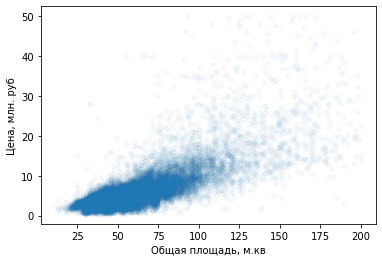

In [66]:
data.plot(x='total_area', y='last_price_millions', kind='scatter', alpha=0.03)
plt.xlabel('Общая площадь, м.кв')
plt.ylabel('Цена, млн. руб')
plt.show()

Определим также коэффициент корреляции общей площади и стоимости объекта.

In [67]:
data['total_area'].corr(data['last_price'])

0.7632089824998106

Чем больше общая площадь объекта, тем больше его стоимость.

**Проверка зависимости цены от жилой площади**

Аналогичным способом определим есть ли зависимость между жилой площадью и ценой объекта.

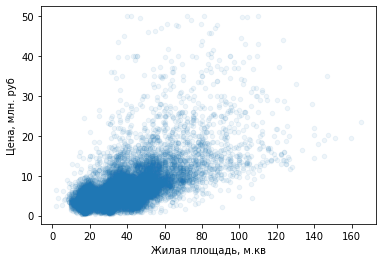

In [68]:
data.plot(x='living_area', y='last_price_millions', kind='scatter', alpha=0.07)
plt.xlabel('Жилая площадь, м.кв')
plt.ylabel('Цена, млн. руб')
plt.show()

Определим также коэффициент корреляции.

In [69]:
data['living_area'].corr(data['last_price'])

0.6475417542724664

Существует незначительная зависимость между ценой квартиры и жилой площадью. Чем больше жилая площадь, тем выше стоимость.

**Проверка зависимости цены от площади кухни**

Аналогичным способом определим есть ли зависимость между площадью кухни и ценой объекта.

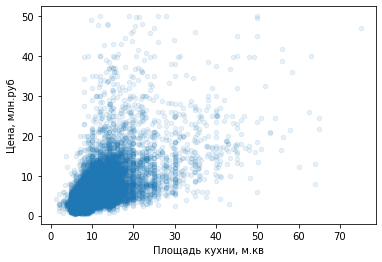

In [70]:
data.plot(x='kitchen_area', y='last_price_millions', kind='scatter', alpha=0.1)
plt.xlabel('Площадь кухни, м.кв')
plt.ylabel('Цена, млн.руб')
plt.show()

Определим также коэффициент корреляции.

In [71]:
data['living_area'].corr(data['last_price'])

0.6475417542724664

Существует незначительная зависимость между ценой квартиры и площадью кухни. Чем больше площадь кухни, тем выше стоимость.

**Проверка зависимости цены от количества комнат**

Аналогичным способом определим есть ли зависимость между количеством комнат и ценой объекта.

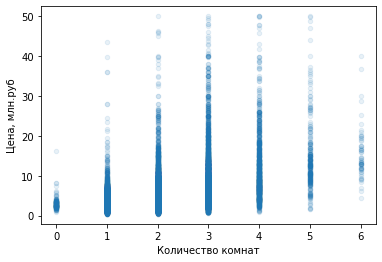

In [72]:
data.plot(x='rooms', y='last_price_millions', kind='scatter', alpha=0.1)
plt.xlabel('Количество комнат')
plt.ylabel('Цена, млн.руб')
plt.show()

На диаграмме рассеивания сложно отследнить зависимость между параметрами. Построим столбчатый график на котором указана медианная цена объекта в зависимости от количества комнат.

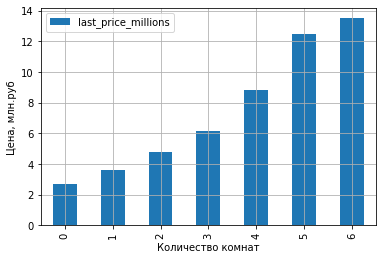

In [73]:
data.pivot_table(index='rooms', values='last_price_millions', aggfunc='median').plot(kind='bar', grid=True)
plt.xlabel('Количество комнат')
plt.ylabel('Цена, млн.руб')
plt.show()

Чем больше комнат в квартире, тем выше её стоимость.

**Проверка зависимости цены от типа этажа (первый, последний, другой)**

Определим есть ли зависимость между типом этажа и ценой объекта. Для этого создадим сводную таблицу, в которой для каждого типа этажа определим медианную цену. Значения отобразим на столбчатом графике.

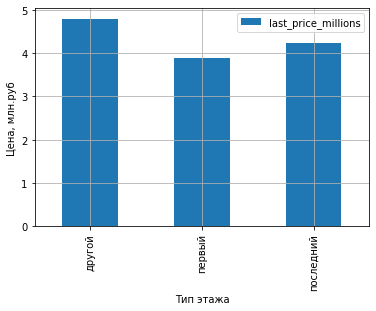

In [74]:
data.pivot_table(index='floor_type', values='last_price_millions', aggfunc='median').plot(kind='bar', grid=True)
plt.xlabel('Тип этажа')
plt.ylabel('Цена, млн.руб')
plt.show()

Стоимость квартиры зависит от типа этажа. Наименьшая средняя цена на квартиры, расположенные на первом этаже, цена выше на квартиры на последнем этаже. Самая высокая цена квартир, расположенных не на первом и не на последнем этаже.

**Проверка зависимости цены от дня недели размещения**

Определим есть ли зависимость между днем недели размещения и ценой объекта.

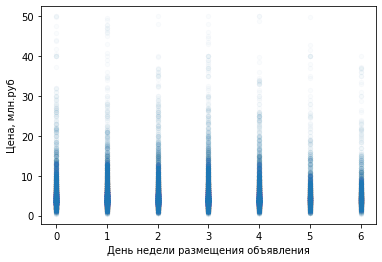

In [75]:
data.plot(x='weekday_exp', y='last_price_millions', kind='scatter', alpha=0.02)
plt.xlabel('День недели размещения объявления')
plt.ylabel('Цена, млн.руб')
plt.show()

Также построим столбчатый график, на котором указана медианная цена объекта по дням недели размещения.

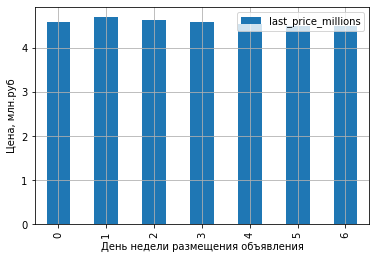

In [76]:
data.pivot_table(index='weekday_exp', values='last_price_millions', aggfunc='median').plot(kind='bar', grid=True)
plt.xlabel('День недели размещения объявления')
plt.ylabel('Цена, млн.руб')
plt.show()

Цена квартиры не зависит от дня недели размещения объявления.

**Проверка зависимости цены от месяца размещения**

Определим есть ли зависимость между месяцем размещения и ценой объекта.

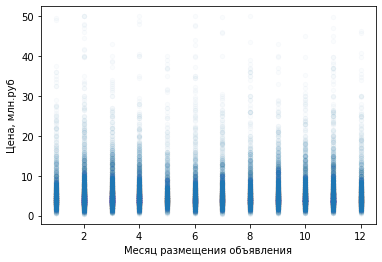

In [77]:
data.plot(x='month_exp', y='last_price_millions', kind='scatter', alpha=0.02)
plt.xlabel('Месяц размещения объявления')
plt.ylabel('Цена, млн.руб')
plt.show()

Также построим столбчатый график, на котором указана медианная цена объекта по месяцам размещения.

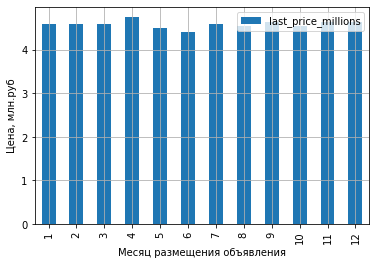

In [78]:
data.pivot_table(index='month_exp', values='last_price_millions', aggfunc='median').plot(kind='bar', grid=True)
plt.xlabel('Месяц размещения объявления')
plt.ylabel('Цена, млн.руб')
plt.show()

Цена квартиры не зависит от дня месяца размещения объявления.

**Проверка зависимости цены от года размещения**

Определим есть ли зависимость между годом размещения и ценой объекта.

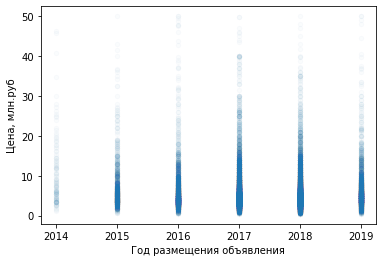

In [79]:
data.plot(x='year_exp', y='last_price_millions', kind='scatter', alpha=0.02)
plt.xlabel('Год размещения объявления')
plt.ylabel('Цена, млн.руб')
plt.show()

Также построим столбчатый график, на котором указана медианная цена объекта по годам размещения.

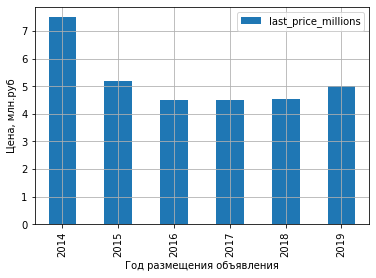

In [80]:
data.pivot_table(index='year_exp', values='last_price_millions', aggfunc='median').plot(kind='bar', grid=True)
plt.xlabel('Год размещения объявления')
plt.ylabel('Цена, млн.руб')
plt.show()

Построим стобчатый график, который показывает количество объявлений по годам.

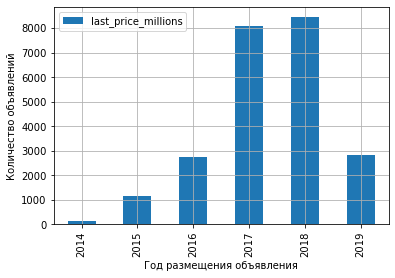

In [81]:
data.pivot_table(index='year_exp', values='last_price_millions', aggfunc='count').plot(kind='bar', grid=True)
plt.xlabel('Год размещения объявления')
plt.ylabel('Количество объявлений')
plt.show()

Для определения зависимости стоимости квартиры от года размещения объявления необходимо получить более полную и сбалансированную выборку.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [82]:
(
    data.pivot_table(index='locality_name', values='price_sq_meter', aggfunc=('count', 'mean'))
    .sort_values(by='count', ascending=False)
    .iloc[:10]
    .sort_values(by='mean', ascending=False)
)

# Создаем сводную таблицу по названиям локаций, котрая содержит количество объявлений и среднюю цену за м.кв квартиры.
# Сортируем таблицу по убыванию количества объявлений.
# Делаем срез из первых 10 значений и сортируем по средней цене за м.кв по убыванию цены.

,count,mean
locality_name,,
Санкт-Петербург,15430,112259.759559
Пушкин,364,103122.538462
деревня Кудрово,471,95326.205945
поселок Парголово,326,90332.236196
поселок Мурино,590,86087.508475
поселок Шушары,440,78677.379545
Колпино,337,75333.287834
Гатчина,307,68746.110749
Всеволожск,397,68719.322418


Самая высокая цена квадратного метра жилья в Санкт-Петербурге (112260 руб.), ниже в Пушкине (103123 руб.) и деревне Кудрово (95326 руб.).\
Самые низкие цены за метр квадратный в представленном выше списке в Выборге (68719 руб.) и Всеволожске (68719 руб.).

Посчитаем, как меняется цена за квадратный метр в Санкт-Петербурге в зависимости от расстояния до центра города. Для каждого километра найдем среднее значение цены. Данные представим в виде столбчатого графика.

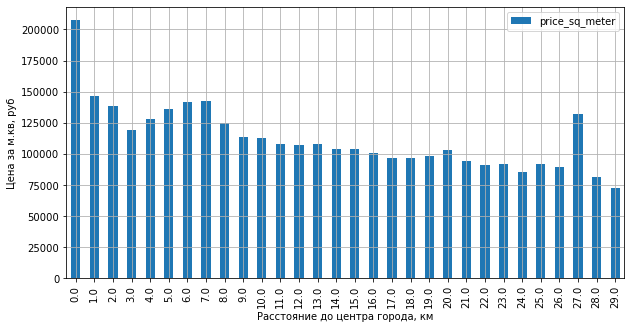

In [83]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_km', values='price_sq_meter', aggfunc='mean')
    .plot(kind='bar', grid=True, figsize=(10, 5))
)
plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Цена за м.кв, руб')
plt.show()

Чтобы понять, откуда появилось выбивающееся значение для расстояния 27 км от центра города, построим аналогичный график, на котором будет показано количество объектов для каждого километра расстояния от центра города.

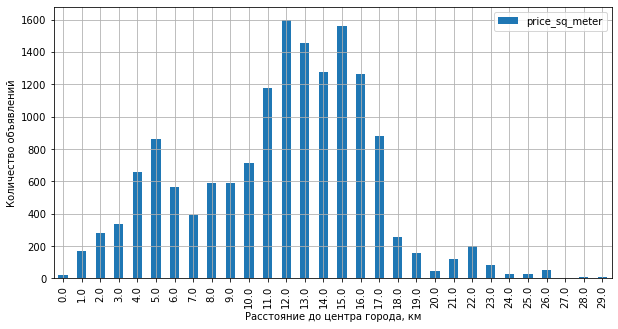

In [84]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_km', values='price_sq_meter', aggfunc='count')
    .plot(kind='bar', grid=True, figsize=(10, 5))
)
plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Количество объявлений')
plt.show()

По данному графику видно, что выбивающееся значение может быть вызвано недостаточным количеством данных по объектам, расположенным на расстоянии 20 км и дальше от центра города

**Вывод:** в ходе анализа выполнено следующее:
1. Произведена проверка зависимости цены от таких параметров как: общая площадь; жилая площадь; площадь кухни; количество комнат; этаж, на котором расположена квартира (первый, последний, другой), дата размещения (день недели, месяц, год), все наблюдения описаны в комментариях. Стоимость квартиры зависит от общей площади, количества комнат, типа этажа. Зависимость от жилой площади и площади кухни незначительная. День недели и месяц размещения объявления не влияют на уровень цены на жилье. С достаточной точностью определить зависимость стоимости от года размещения объявления не представляется возможным, поскольку выборка не сбалансирована. 
2. Посчитана средняя цена одного квадратного метра жилья в 10 населённых пунктах с наибольшим числом объявлений. Самая высокая цена цена квадратного метра жилья в Санкт-Петербурге (112260 руб.). Самая низкия - в Выборге 58238 руб.).
3. Выполнена проверка зависимости стоимости объектов в Санкт-Петербурге от расстояния до центра города. На основании выполненного анализа можно сделать вывод о том, что стоимость объектов зависит от расстояния до центра города. Чем ближе объект к центру города, тем выше стоимость квадратного метра площади объекта.

## Общий вывод

На основании данных сервиса Яндекс.Недвижимость - архива объявлений о продаже квартир за период с *27 ноября 2014 года по 3 мая 2019 года* установлены параметры, влияющие на стоимость объекта. Это позволит построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности.

По построенным диаграммам распределения выявлены диапазоны наиболее часто встречающихся в предоставленной выборке данных значений по различным критериям:
- наиболее часто встречаются объявления с объектами общей площадью от 30 до 60 м.кв, жилой площадью от 16 до 20 и от 28 до 32 м.кв, площадью к ухни от 6 до 12 м. кв.;
- в данных больше всего объектов стоимостью 3-4 млн руб;
- чаще всего объекты имеют 1 и 2 комнаты, реже 3 комнаты;
- в наибольшем количестве представлены объекты с номерами этажей от 1 до 5;
- чаще всего объекты расположены в пятиэтажных и девятиэтажных домах;
- чаще встречаются объекты с расстоянием 10 - 14 км до центра города. В целом наибольшая часть выборки представлена объектами, находящимися на расстоянии до 18 км от центра города;
- наиболее часто встречаются объекты с расстоянием от 10 до 38 км до аэропорта;
- среди объектов выборки, для которых указано расстояние до ближайшего парка (примерно 30% выборки), наиболее часто встречаются объекты, на расстоянии 200-600 м от которых находится парк;
- в будние дни объявления публикуются чаще, чем в выходные;
- можно отметить некую сезонность. Чаще всего объявления публикуются с февраля по апрель. Также с сентября отмечается рост количества публикации объявлений, который достигает пика в ноябре.

Среднее время продажи квартиры из архива данных составляет **95 дней**.

В ходе анализа также проверены гипотезы о наличии зависимости между ценой объекта и следующими критериями: общая площадь; жилая площадь; площадь кухни; количество комнат; этаж, на котором расположена квартира (первый, последний, другой); дата размещения (день недели, месяц, год).

**Стоимость квартиры зависит от его общей площади**\
Чем больше площадь объекта, тем больше его стоимость.

**Стоимость квартиры незначительно зависит от его жилой площади и площади кухни**\
С увеличением отдельно жилой площади или площади кухни прослеживается незначительное увеличение стоимости жилья. Более целесообразно ориентироваться на зависимость стоимости объекта от его общей площади.

**Стоимость квартиры зависит от количества комнат**\
С увеличением количества комнат увеличивается стоимость объекта.

**Стоимость квартиры зависит от типа этажа (первый, последний или другой)**\
Медианная стоимость жилья, расположенного на первом этаже самая низкая, выше на последнем этаже, самая высокая - для объектов, расположенных не на первом и не на последнем этаже.

**Стоимость квартиры не зависит от дня недели размещения и месяца размещения объявления**

Для того, чтобы определить зависимость цены квартиры от года размещения объявления, необходимо получить более полную и однородную по годам размещения выборку данных.

На основании данных по 10 населенным пунктам с наибольшим числом объявлений установлено следующее:
- *самая высокая цена квадратного метра жилья в Санкт-Петербурге (112260 руб.), ниже в Пушкине (103123 руб.) и деревне Кудрово (95326 руб.)*
- *самые низкие цены за метр квадратный в представленном выше списке в Выборге (68719 руб.) и Всеволожске (68719 руб.)*

Также в ходе анализа установлено, что **цена квадратного метра квартиры зависит от расстояния до центра города**. Чем ближе к центру находится объект, тем выше цена за квадратный метр его площади. Данное исследование выполнено для города Санкт-Петербург.

**Рекомендации:**
1. Для построения автоматизированной системы для отслеживания аномалий и мошеннической деятельности целесообразно использовать следующие параметры: *общая площадь, количество комнат, тип этажа и расстояние до центра города.*
2. Для оценки влияния года размещения объявления на стоимость квартиры необходимо получить более полную и по-возможности сбалансированную выборку данных.
3. Для предотвращения получения неявных дубликатов в названиях населенных пунктов целесообразно предотвратить введение пользователями названий с различным написанием (например, показывать пользователю выпадающий список с предлагаемыми названиями после того, как будет введено определенное количество символов названия).